# Analysis of results from multiple reference/citation of public medical image datasets in scientific papers from different venues

## Loading of results

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from dirty_cat import fuzzy_join

papers_info = pd.read_csv("../../Results/extraction/papers_infos_openalex.csv")
df_oa_reference_allInfo = pd.read_csv("../../Results/extraction/oa_papers_datasets_reference.csv").drop_duplicates(["name"])
df_oa_reference_allInfo["year"] = papers_info["year"]
df_oa_reference_allInfo["venue"] = papers_info["venue"]
df_oa_reference_allInfo = df_oa_reference_allInfo[((df_oa_reference_allInfo["year"]>=2013) & (df_oa_reference_allInfo["year"]<=2023))| (df_oa_reference_allInfo["year"].isna())]

df_oa_abstract_allInfo = pd.read_csv("../../Results/extraction/oa_papers_datasets_abstract.csv").drop_duplicates(["name"])
df_oa_abstract_allInfo["year"] = papers_info["year"]
df_oa_abstract_allInfo["venue"] = papers_info["venue"]
df_oa_abstract_allInfo = df_oa_abstract_allInfo[((df_oa_abstract_allInfo["year"]>=2013) & (df_oa_abstract_allInfo["year"]<=2023)) | (df_oa_abstract_allInfo["year"].isna())]

fulltext_abstract_info = pd.read_csv("../../Results/extraction/fulltext_datasets_abstract.csv").drop_duplicates(["name"])
fulltext_references_info = pd.read_csv("../../Results/extraction/fulltext_datasets_references.csv").drop_duplicates(["name"])
fulltext_method_info = pd.read_csv("../../Results/extraction/fulltext_datasets_method.csv").drop_duplicates(["name"])
#fulltext_results_info = pd.read_csv("../../Results/extraction/fulltext_datasets_results.csv").drop_duplicates(["name"])

common_papers = fuzzy_join(
    fulltext_abstract_info,  # our table to join
    df_oa_abstract_allInfo,  # the table to join with
    left_on="name",  # the first join key column
    right_on="name",  # the second join key column
    return_score=True,
)

#Names for fulltext df
common_papers_x = common_papers["name_x"]

#Name for OA df
common_papers_y = common_papers["name_y"]

fulltext_abstract_info["venue"] = common_papers["venue"]
fulltext_references_info["venue"] = common_papers["venue"]
fulltext_method_info["venue"] = common_papers["venue"]
#fulltext_results_info["venue"] = common_papers["venue"]



/home/theo/miniconda3/envs/PublicDataset/lib/python3.12/site-packages/dirty_cat/_fuzzy_join.py:320: UserWarning: This feature is still experimental.
  warnings.warn("This feature is still experimental.")


In [3]:
datasets_columns = ["ACDC","BRATS","LIDC-IDRI","DRIVE","PROMISE12","Chexpert","PadChest","PAD-UFES-20","CAMELYON","CADDementia","MRNet","PROSTATEx","MIMIC","CBIS-DDSM"]
#datasets_columns = ["ACDC","BRATS","LIDC-IDRI","DRIVE","Chexpert","PadChest","PAD-UFES-20","CAMELYON","PROSTATEx","MIMIC","CBIS-DDSM"]

#datasets_columns = df_oa_reference_allInfo.columns.difference(['doi','name','venue','year'])

## Basic statistics:
Number of papers per conference

In [4]:
papers_info.groupby("venue").count()["title"]

venue
CHIL       104
MICCAI    4569
MIDL       266
Name: title, dtype: int64

In [6]:
fulltext_abstract_info.groupby("venue").count()["name"]

venue
CHIL        89
MICCAI    2319
MIDL       212
Name: name, dtype: int64

Number of papers for each conference with references computed

In [ ]:
papers_info[papers_info["references"] == papers_info["references"]].groupby("venue").count()["title"]

venue
CHIL        57
MICCAI    4554
MIDL        49
Name: title, dtype: int64

Number of papers for each conference with abstract computed

In [ ]:
papers_info[papers_info["abstract"] == papers_info["abstract"]].groupby("venue").count()["title"]

venue
CHIL        90
MICCAI    4529
MIDL       120
Name: title, dtype: int64

In [ ]:
papers_info[papers_info["references"] != papers_info["references"]]

,doi,title,venue,year,abstract,references,fulltext_link
10,10.1007/978-3-031-43895-0_53,Adaptive Multi-scale Online Likelihood Network...,MICCAI,2023.0,"{'Existing': [0], 'interactive': [1], 'segment...",NaN,https://arxiv.org/pdf/2303.13696
41,10.1007/978-3-031-43996-4_63,Deep Reinforcement Learning Based System for I...,MICCAI,2023.0,"{'Hyperspectral': [0], 'imaging': [1], '(HSI)'...",NaN,https://arxiv.org/pdf/2307.11638
64,10.1007/978-3-031-43999-5_34,ASCON: Anatomy-aware Supervised Contrastive Le...,MICCAI,2023.0,"{'While': [0], 'various': [1], 'deep': [2], 'l...",NaN,https://arxiv.org/pdf/2307.12225
76,10.1007/978-3-031-43901-8_47,BerDiff: Conditional Bernoulli Diffusion Model...,MICCAI,2023.0,"{'Medical': [0], 'image': [1, 74, 87, 201, 230...",NaN,https://arxiv.org/pdf/2304.04429
149,10.1007/978-3-031-43996-4_11,Point Cloud Diffusion Models for Automatic Imp...,MICCAI,2023.0,"{'Advances': [0], 'in': [1, 47, 90], '3D': [2,...",NaN,https://arxiv.org/pdf/2303.08061
...,...,...,...,...,...,...,...
4884,https://doi.org/10.48550/arxiv.2204.03969,Disability prediction in multiple sclerosis us...,CHIL,2022.0,"{'Literature': [0], 'on': [1, 10, 93, 164, 184...",NaN,http://arxiv.org/pdf/2204.03969
4885,NaN,How to validate Machine Learning Models Prior ...,CHIL,NaN,NaN,NaN,NaN
4886,NaN,Learning Unsupervised Representations for ICU ...,CHIL,NaN,NaN,NaN,NaN
4887,https://doi.org/10.48550/arxiv.2203.12609,Improving the Fairness of Chest X-ray Classifiers,CHIL,2022.0,"{'Deep': [0], 'learning': [1], 'models': [2], ...",NaN,http://arxiv.org/pdf/2203.12609


## Dataviz using only OpenAlex

### Number of presence in references by dataset

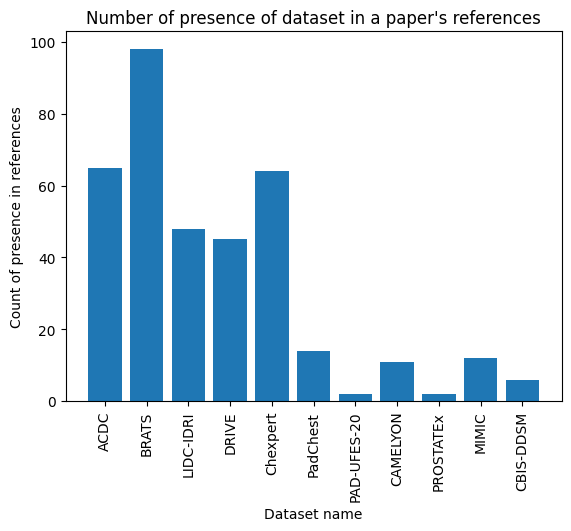

ACDC           65
BRATS          98
LIDC-IDRI      48
DRIVE          45
Chexpert       64
PadChest       14
PAD-UFES-20     2
CAMELYON       11
PROSTATEx       2
MIMIC          12
CBIS-DDSM       6
dtype: int64

In [4]:
df_oa_reference_toplot = df_oa_reference_allInfo[datasets_columns]
plt.figure()
plt.bar(datasets_columns,df_oa_reference_toplot.sum())
plt.xticks(datasets_columns, rotation='vertical')
plt.xlabel("Dataset name")
plt.ylabel("Count of presence in references")
plt.title("Number of presence of dataset in a paper's references")
plt.savefig('../../Results/analysis/paper_ref_per_dataset.png')
plt.show()
df_oa_reference_toplot.sum()

Comments:

### Number of presence in references by dataset and venues

<Figure size 640x480 with 0 Axes>

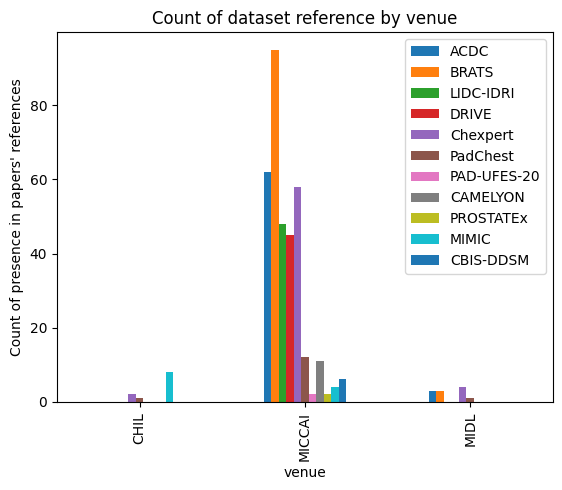

,ACDC,BRATS,LIDC-IDRI,DRIVE,Chexpert,PadChest,PAD-UFES-20,CAMELYON,PROSTATEx,MIMIC,CBIS-DDSM
venue,,,,,,,,,,,
CHIL,0,0,0,0,2,1,0,0,0,8,0
MICCAI,62,95,48,45,58,12,2,11,2,4,6
MIDL,3,3,0,0,4,1,0,0,0,0,0


In [5]:
df_oa_reference_toplot = df_oa_reference_allInfo[df_oa_reference_allInfo.columns.difference(['doi','name','year'])]

#groupby_venues = df_oa_abstract_toplot[["venue","ACDC"]].groupby("venue").sum()
count_per_dataset_and_venue = df_oa_reference_toplot.groupby("venue").sum()[datasets_columns]
plt.figure()
t = count_per_dataset_and_venue.plot.bar()
plt.ylabel("Count of presence in papers' references")
plt.title("Count of dataset reference by venue")
plt.savefig('../../Results/analysis/paper_ref_per_venue_and_dataset.png')
plt.legend(bbox_to_anchor=(1,1))
plt.show()
count_per_dataset_and_venue

### Number of presence in references by dataset and years

<Figure size 640x480 with 0 Axes>

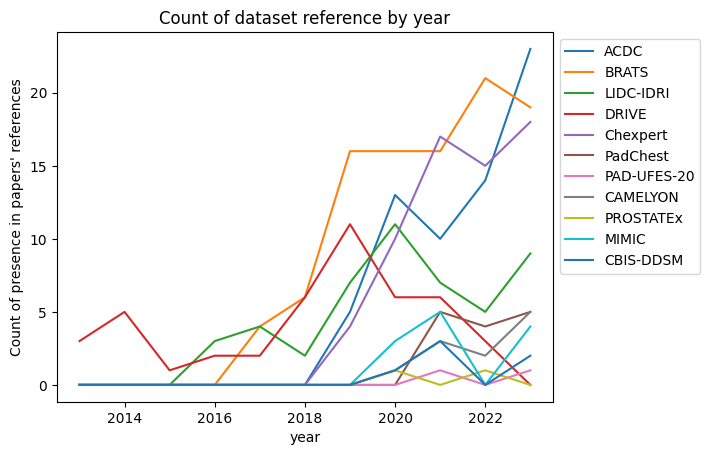

,ACDC,BRATS,LIDC-IDRI,DRIVE,Chexpert,PadChest,PAD-UFES-20,CAMELYON,PROSTATEx,MIMIC,CBIS-DDSM
year,,,,,,,,,,,
2013.0,0,0,0,3,0,0,0,0,0,0,0
2014.0,0,0,0,5,0,0,0,0,0,0,0
2015.0,0,0,0,1,0,0,0,0,0,0,0
2016.0,0,0,3,2,0,0,0,0,0,0,0
2017.0,0,4,4,2,0,0,0,0,0,0,0
2018.0,0,6,2,6,0,0,0,0,0,0,0
2019.0,5,16,7,11,4,0,0,0,0,0,0
2020.0,13,16,11,6,10,0,0,1,1,3,1
2021.0,10,16,7,6,17,5,1,3,0,5,3


<Figure size 640x480 with 0 Axes>

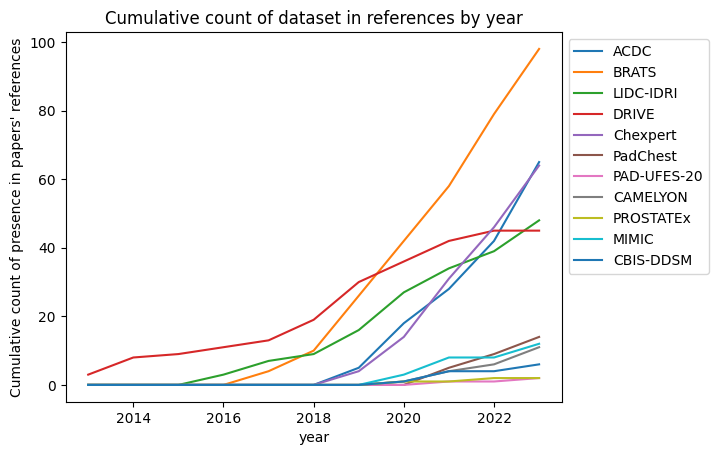

,ACDC,BRATS,LIDC-IDRI,DRIVE,Chexpert,PadChest,PAD-UFES-20,CAMELYON,PROSTATEx,MIMIC,CBIS-DDSM
year,,,,,,,,,,,
2013.0,0,0,0,3,0,0,0,0,0,0,0
2014.0,0,0,0,8,0,0,0,0,0,0,0
2015.0,0,0,0,9,0,0,0,0,0,0,0
2016.0,0,0,3,11,0,0,0,0,0,0,0
2017.0,0,4,7,13,0,0,0,0,0,0,0
2018.0,0,10,9,19,0,0,0,0,0,0,0
2019.0,5,26,16,30,4,0,0,0,0,0,0
2020.0,18,42,27,36,14,0,0,1,1,3,1
2021.0,28,58,34,42,31,5,1,4,1,8,4


In [6]:
df_oa_reference_toplot = df_oa_reference_allInfo[df_oa_reference_allInfo.columns.difference(['doi','name','venue'])]
count_per_dataset_and_venue = df_oa_reference_toplot.groupby("year").sum()[datasets_columns]
plt.figure()
t = count_per_dataset_and_venue.plot()
plt.ylabel("Count of presence in papers' references")
plt.legend(bbox_to_anchor=(1,1))
plt.title("Count of dataset reference by year")
plt.savefig('../../Results/analysis/dataset_ref_per_year.png')
plt.show()
display(count_per_dataset_and_venue)

cumulcount_per_dataset_and_venue = count_per_dataset_and_venue.cumsum()
plt.figure()
cumulcount_per_dataset_and_venue.plot()
plt.ylabel("Cumulative count of presence in papers' references")
plt.legend(bbox_to_anchor=(1,1))
plt.title("Cumulative count of dataset in references by year")
plt.savefig('../../Results/analysis/dataset_ref_per_year_cumul.png')
plt.show()
display(cumulcount_per_dataset_and_venue)

### Number of presence in abstract by dataset

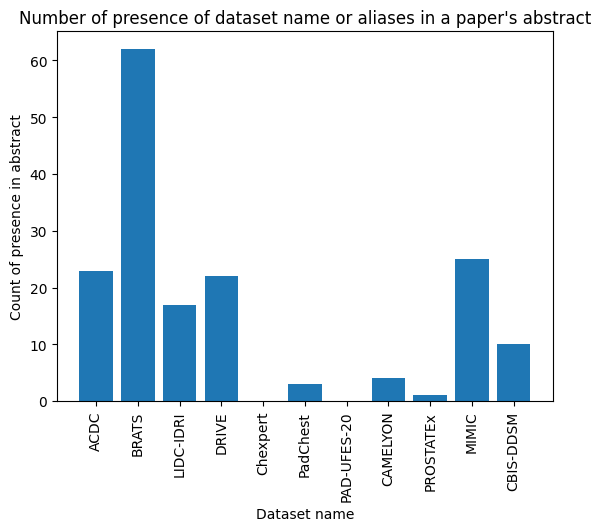

ACDC           23
BRATS          62
LIDC-IDRI      17
DRIVE          22
Chexpert        0
PadChest        3
PAD-UFES-20     0
CAMELYON        4
PROSTATEx       1
MIMIC          25
CBIS-DDSM      10
dtype: int64

In [7]:
df_oa_abstract_toplot = df_oa_abstract_allInfo[datasets_columns]
plt.figure()
plt.bar(datasets_columns,df_oa_abstract_toplot.sum())
plt.xticks(datasets_columns, rotation='vertical')
plt.xlabel("Dataset name")
plt.ylabel("Count of presence in abstract")
plt.title("Number of presence of dataset name or aliases in a paper's abstract")
plt.savefig('../../Results/analysis/paper_abstract_per_dataset.png')
plt.show()
display(df_oa_abstract_toplot.sum())

Comments:

### Number of presence in abstract by dataset and venues

<Figure size 640x480 with 0 Axes>

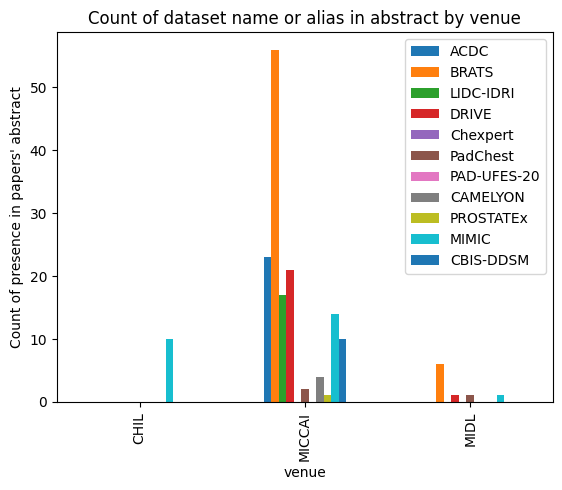

,ACDC,BRATS,LIDC-IDRI,DRIVE,Chexpert,PadChest,PAD-UFES-20,CAMELYON,PROSTATEx,MIMIC,CBIS-DDSM
venue,,,,,,,,,,,
CHIL,0,0,0,0,0,0,0,0,0,10,0
MICCAI,23,56,17,21,0,2,0,4,1,14,10
MIDL,0,6,0,1,0,1,0,0,0,1,0


In [8]:
#datasets_columns = df_oa_abstract_allInfo.columns.difference(['doi','name','venue','year'])
df_oa_abstract_toplot = df_oa_abstract_allInfo[df_oa_abstract_allInfo.columns.difference(['doi','name','year'])]
count_per_dataset_and_venue = df_oa_abstract_toplot.groupby("venue").sum()[datasets_columns]
plt.figure()
t = count_per_dataset_and_venue.plot.bar()
plt.ylabel("Count of presence in papers' abstract")
plt.legend(bbox_to_anchor=(1,1))
plt.title("Count of dataset name or alias in abstract by venue")
plt.savefig('../../Results/analysis/paper_abstract_per_venue_and_dataset.png')

plt.show()
count_per_dataset_and_venue

### Number of presence in references by dataset and years

<Figure size 640x480 with 0 Axes>

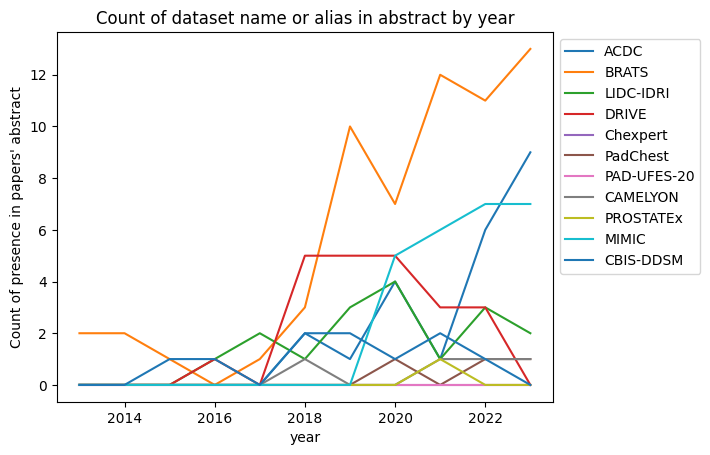

,ACDC,BRATS,LIDC-IDRI,DRIVE,Chexpert,PadChest,PAD-UFES-20,CAMELYON,PROSTATEx,MIMIC,CBIS-DDSM
year,,,,,,,,,,,
2013.0,0,2,0,0,0,0,0,0,0,0,0
2014.0,0,2,0,0,0,0,0,0,0,0,0
2015.0,0,1,0,0,0,0,0,0,0,0,1
2016.0,0,0,1,1,0,0,0,0,0,0,1
2017.0,0,1,2,0,0,0,0,0,0,0,0
2018.0,2,3,1,5,0,0,0,1,0,0,2
2019.0,1,10,3,5,0,0,0,0,0,0,2
2020.0,4,7,4,5,0,1,0,0,0,5,1
2021.0,1,12,1,3,0,0,0,1,1,6,2


<Figure size 640x480 with 0 Axes>

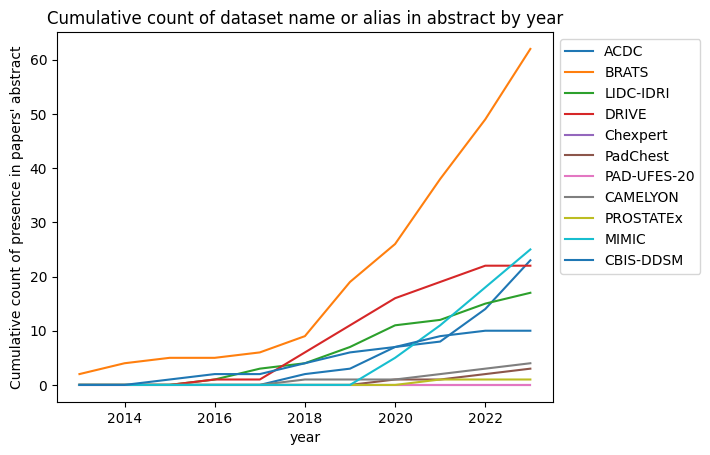

,ACDC,BRATS,LIDC-IDRI,DRIVE,Chexpert,PadChest,PAD-UFES-20,CAMELYON,PROSTATEx,MIMIC,CBIS-DDSM
year,,,,,,,,,,,
2013.0,0,2,0,0,0,0,0,0,0,0,0
2014.0,0,4,0,0,0,0,0,0,0,0,0
2015.0,0,5,0,0,0,0,0,0,0,0,1
2016.0,0,5,1,1,0,0,0,0,0,0,2
2017.0,0,6,3,1,0,0,0,0,0,0,2
2018.0,2,9,4,6,0,0,0,1,0,0,4
2019.0,3,19,7,11,0,0,0,1,0,0,6
2020.0,7,26,11,16,0,1,0,1,0,5,7
2021.0,8,38,12,19,0,1,0,2,1,11,9


In [9]:
#datasets_columns = df_oa_abstract_allInfo.columns.difference(['doi','name','venue','year'])
df_oa_abstract_toplot = df_oa_abstract_allInfo[df_oa_abstract_allInfo.columns.difference(['doi','name','venue'])]
count_per_dataset_and_venue = df_oa_abstract_toplot.groupby("year").sum()[datasets_columns]
plt.figure()
count_per_dataset_and_venue.plot()
plt.ylabel("Count of presence in papers' abstract")
plt.title("Count of dataset name or alias in abstract by year")
plt.savefig('../../Results/analysis/dataset_abstract_per_year.png')
plt.legend(bbox_to_anchor=(1,1))
plt.show()
display(count_per_dataset_and_venue)

cumulcount_per_dataset_and_venue = count_per_dataset_and_venue.cumsum()[datasets_columns]
plt.figure()
cumulcount_per_dataset_and_venue.plot()
plt.ylabel("Cumulative count of presence in papers' abstract")
plt.title("Cumulative count of dataset name or alias in abstract by year")
plt.savefig('../../Results/analysis/dataset_abstract_per_year_cumul.png')
plt.legend(bbox_to_anchor=(1,1))
plt.show()
display(cumulcount_per_dataset_and_venue)

### Dataviz, combination abstract and references

Text(0.5, 1.0, 'Number of time a dataset is cited both in the abstract and references')

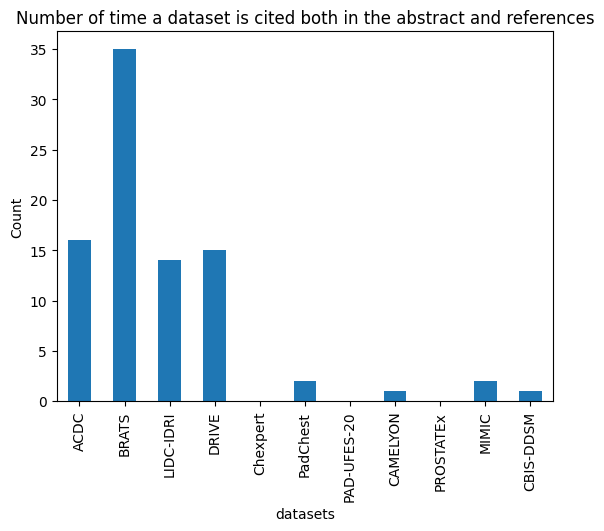

In [10]:
t1=df_oa_reference_allInfo[datasets_columns]
t2=df_oa_abstract_allInfo[datasets_columns]
plt.figure()
(t1&t2).sum().plot.bar()
plt.xlabel("datasets")
plt.ylabel("Count")
plt.title("Number of time a dataset is cited both in the abstract and references")

In [11]:
from matplotlib_venn import venn2,venn2_unweighted
number_references = sum(t1.sum())
number_abstract = sum(t2.sum())
number_of_papers = len(t1)
intersection = sum((t1&t2).sum())

4936 367 167 86


Text(0.5, 1.0, 'Venn diagram of presence in references and abstract')

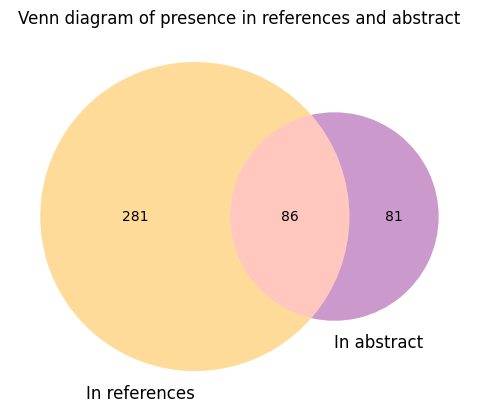

In [12]:
print(number_of_papers,number_references,number_abstract,intersection)
plt.figure()
venn2(subsets = (number_references-intersection,number_abstract-intersection,intersection),set_labels=["In references","In abstract"],set_colors=('orange','purple'))
plt.title("Venn diagram of presence in references and abstract")

Text(0.5, 1.0, 'Venn diagram of presence in references and abstract for ACDC dataset')

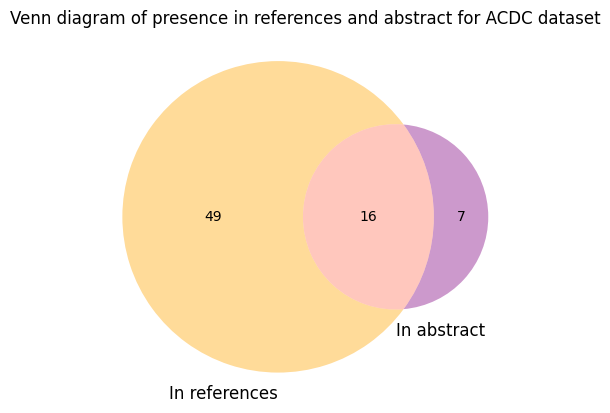

In [13]:
number_references = t1["ACDC"].sum()
number_abstract = t2["ACDC"].sum()
number_of_papers = len(t1)
intersection = (t1["ACDC"]&t2["ACDC"]).sum()

plt.figure()
venn_cicles_res = venn2(subsets = (number_references-intersection,number_abstract-intersection,intersection),set_labels=["In references","In abstract"],set_colors=('orange','purple'))
plt.title("Venn diagram of presence in references and abstract for ACDC dataset")

## Using full text

In [14]:
# fulltext_abstract_info
# fulltext_references_info
# fulltext_method_info
# fulltext_results_info

In [15]:
one_fulltext_mention = fulltext_abstract_info[datasets_columns] | fulltext_references_info[datasets_columns] | fulltext_method_info[datasets_columns]
one_fulltext_mention["venue"] = fulltext_abstract_info["venue"]

ACDC           29
BRATS          73
LIDC-IDRI       9
DRIVE          22
Chexpert        6
PadChest        6
PAD-UFES-20     0
CAMELYON        8
PROSTATEx       3
MIMIC          38
CBIS-DDSM       5
dtype: int64

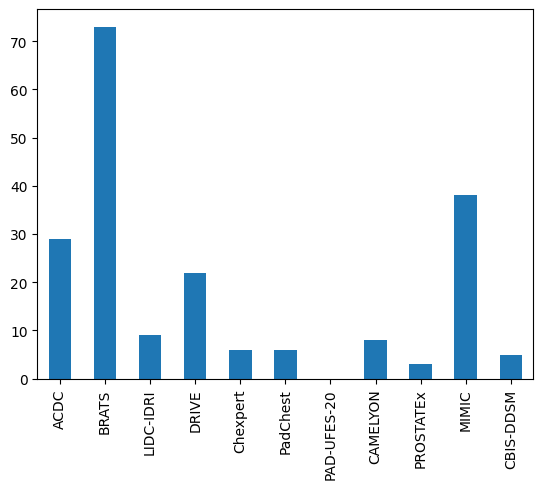

In [16]:
one_fulltext_mention[datasets_columns].sum().plot.bar()
one_fulltext_mention[datasets_columns].sum()

,ACDC,BRATS,LIDC-IDRI,DRIVE,Chexpert,PadChest,PAD-UFES-20,CAMELYON,PROSTATEx,MIMIC,CBIS-DDSM
venue,,,,,,,,,,,
CHIL,0,0,0,0,2,1,0,0,0,24,0
MICCAI,24,58,9,19,2,1,0,6,2,12,5
MIDL,5,15,0,3,2,4,0,2,1,2,0


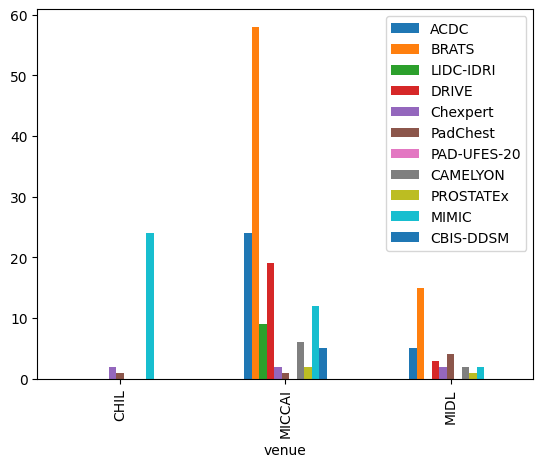

In [17]:
one_fulltext_mention.groupby("venue").sum().plot.bar()
one_fulltext_mention.groupby("venue").sum()

In [18]:
one_fulltext_mention_no_ref = fulltext_abstract_info[datasets_columns] | fulltext_method_info[datasets_columns]
one_fulltext_mention_no_ref["venue"] = fulltext_abstract_info["venue"]

ACDC           18
BRATS          50
LIDC-IDRI       8
DRIVE           8
Chexpert        1
PadChest        2
PAD-UFES-20     0
CAMELYON        1
PROSTATEx       1
MIMIC          30
CBIS-DDSM       3
dtype: int64

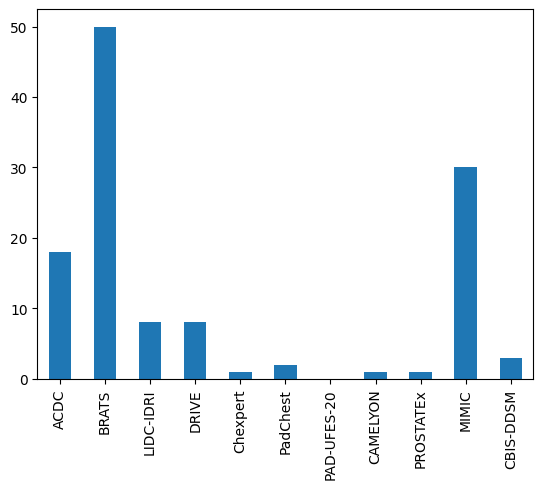

In [19]:
one_fulltext_mention_no_ref[datasets_columns].sum().plot.bar()
one_fulltext_mention_no_ref[datasets_columns].sum()

In [20]:
one_fulltext_mention_and_ref = fulltext_references_info[datasets_columns] & (fulltext_abstract_info[datasets_columns] | fulltext_method_info[datasets_columns])
one_fulltext_mention_and_ref["venue"] = fulltext_abstract_info["venue"]

ACDC            3
BRATS          24
LIDC-IDRI       0
DRIVE           6
Chexpert        0
PadChest        0
PAD-UFES-20     0
CAMELYON        0
PROSTATEx       0
MIMIC          14
CBIS-DDSM       0
dtype: int64

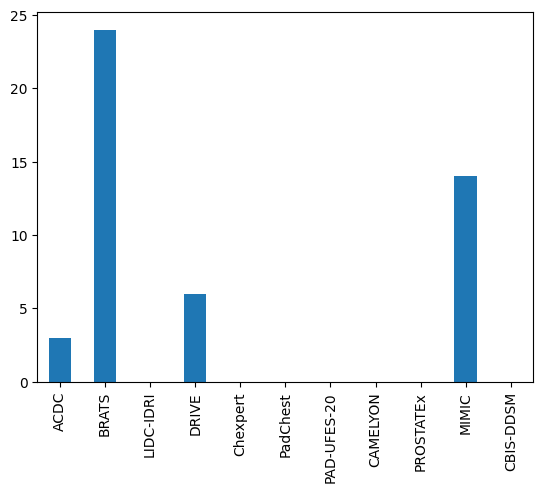

In [21]:
one_fulltext_mention_and_ref[datasets_columns].sum().plot.bar()
one_fulltext_mention_and_ref[datasets_columns].sum()

## Co-occurence matrix

In [22]:
import seaborn as sns
import numpy as np
co_occ = df_oa_reference_allInfo[datasets_columns].astype(int)
co_occ = co_occ.T.dot(co_occ)
co_occ

,ACDC,BRATS,LIDC-IDRI,DRIVE,Chexpert,PadChest,PAD-UFES-20,CAMELYON,PROSTATEx,MIMIC,CBIS-DDSM
ACDC,65,3,1,0,0,0,0,0,0,0,0
BRATS,3,98,2,0,2,0,0,0,0,0,0
LIDC-IDRI,1,2,48,1,0,0,0,0,0,1,0
DRIVE,0,0,1,45,0,0,0,0,0,0,0
Chexpert,0,2,0,0,64,6,0,0,0,2,1
PadChest,0,0,0,0,6,14,0,0,0,0,0
PAD-UFES-20,0,0,0,0,0,0,2,0,0,0,0
CAMELYON,0,0,0,0,0,0,0,11,0,0,0
PROSTATEx,0,0,0,0,0,0,0,0,2,0,0
MIMIC,0,0,1,0,2,0,0,0,0,12,0


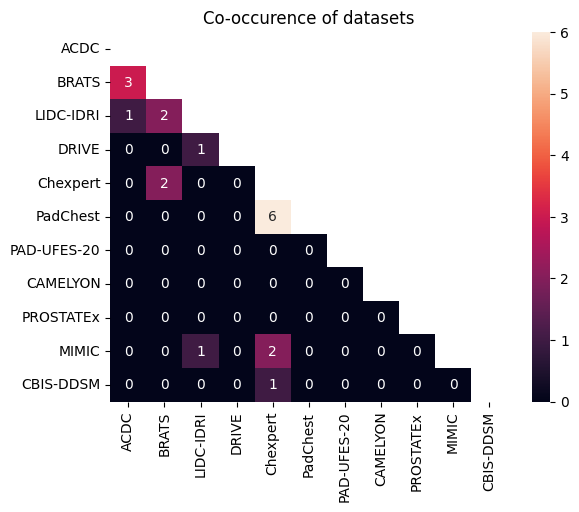

In [23]:
plt.figure()
plt.title("Co-occurence of datasets")
sns.heatmap(co_occ,annot=True,mask=np.triu(np.ones_like(co_occ)))
plt.savefig('../../Results/analysis/Co_occurence_datasets.png',bbox_inches='tight')
plt.show()

## Stack bar per dataset

In [24]:
# Merge OpenAlex with Fulltext extraction for references and abstract

#For abstract
combination = (df_oa_abstract_allInfo[df_oa_abstract_allInfo["name"].isin(common_papers_y)][datasets_columns].reset_index(drop=True))|(fulltext_abstract_info[fulltext_abstract_info["name"].isin(common_papers_x)][datasets_columns].reset_index(drop=True))
combination.index = common_papers["name_x"]
df_merge_abstract = df_oa_abstract_allInfo.set_index(["name"])
df_merge_abstract.update(combination)

In [25]:
#For references
fulltext_references_info["name"] = fulltext_references_info["name"].apply(lambda x:x.removesuffix("pdf"))
combination = df_oa_reference_allInfo[df_oa_reference_allInfo["name"].isin(common_papers_y)][datasets_columns].reset_index(drop=True)|fulltext_references_info[fulltext_references_info["name"].isin(common_papers_x)][datasets_columns].reset_index(drop=True)
combination.index = common_papers["name_x"]
df_merge_ref = df_oa_reference_allInfo.set_index(["name"])
df_merge_ref.update(combination)

In [26]:
df_abstract_and_ref = df_merge_ref[datasets_columns] & df_merge_abstract[datasets_columns]
df_abstract_and_ref.index = df_merge_ref.index

df_only_abstract = df_merge_abstract[datasets_columns] & (~df_abstract_and_ref[datasets_columns])
df_only_ref = df_merge_ref[datasets_columns] & (~df_abstract_and_ref[datasets_columns])

total_papers_per_dataset = df_only_ref.sum() + df_only_abstract.sum() + df_abstract_and_ref.sum()

In [27]:
total_papers_per_dataset

ACDC            72
BRATS          125
LIDC-IDRI       51
DRIVE           52
Chexpert        64
PadChest        15
PAD-UFES-20      2
CAMELYON        14
PROSTATEx        3
MIMIC           35
CBIS-DDSM       15
dtype: int64

In [28]:
perc_dataset_ref = ((df_only_ref.sum() / total_papers_per_dataset) * 100).fillna(0)
perc_dataset_all = ((df_abstract_and_ref.sum() / total_papers_per_dataset) * 100).fillna(0)
perc_dataset_abstract = ((df_only_abstract.sum() / total_papers_per_dataset) * 100).fillna(0)

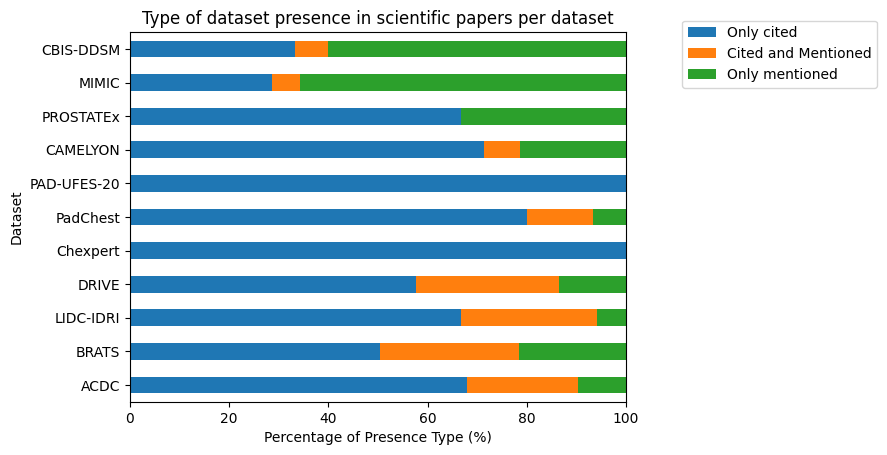

,ACDC,BRATS,LIDC-IDRI,DRIVE,Chexpert,PadChest,PAD-UFES-20,CAMELYON,PROSTATEx,MIMIC,CBIS-DDSM
Only cited,68.055556,50.4,66.666667,57.692308,100.0,80.000000,100.0,71.428571,66.666667,28.571429,33.333333
Cited and Mentioned,22.222222,28.0,27.450980,28.846154,0.0,13.333333,0.0,7.142857,0.000000,5.714286,6.666667
Only mentioned,9.722222,21.6,5.882353,13.461538,0.0,6.666667,0.0,21.428571,33.333333,65.714286,60.000000


In [29]:
df_stackbar = pd.DataFrame(data=[perc_dataset_ref,perc_dataset_all,perc_dataset_abstract])
df_stackbar.index = ["Only cited","Cited and Mentioned", "Only mentioned"]
ax = df_stackbar.T.plot.barh(stacked=True)

# Place the legend
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.xlim(0, 100)
plt.title("Type of dataset presence in scientific papers per dataset")
plt.xlabel('Percentage of Presence Type (%)')
plt.ylabel('Dataset')
plt.show()
df_stackbar

## Stack bar per dataset and venue

In [30]:
df_abstract_and_ref["venue"] = df_merge_ref["venue"]
df_only_abstract["venue"] = df_merge_ref["venue"]
df_only_ref["venue"] = df_merge_ref["venue"]

df_only_ref_venue = df_only_ref.groupby("venue").sum().T
df_only_abstract_venue = df_only_abstract.groupby("venue").sum().T
df_abstract_and_ref_venue = df_abstract_and_ref.groupby("venue").sum().T
total_papers_per_dataset_and_venue = df_only_ref_venue + df_only_abstract_venue + df_abstract_and_ref_venue

In [31]:
perc_ref_venue = ((df_only_ref_venue / total_papers_per_dataset_and_venue) * 100).fillna(0).T
perc_abstract_venue = ((df_only_abstract_venue / total_papers_per_dataset_and_venue) * 100).fillna(0).T
perc_both_venue = ((df_abstract_and_ref_venue / total_papers_per_dataset_and_venue) * 100).fillna(0).T

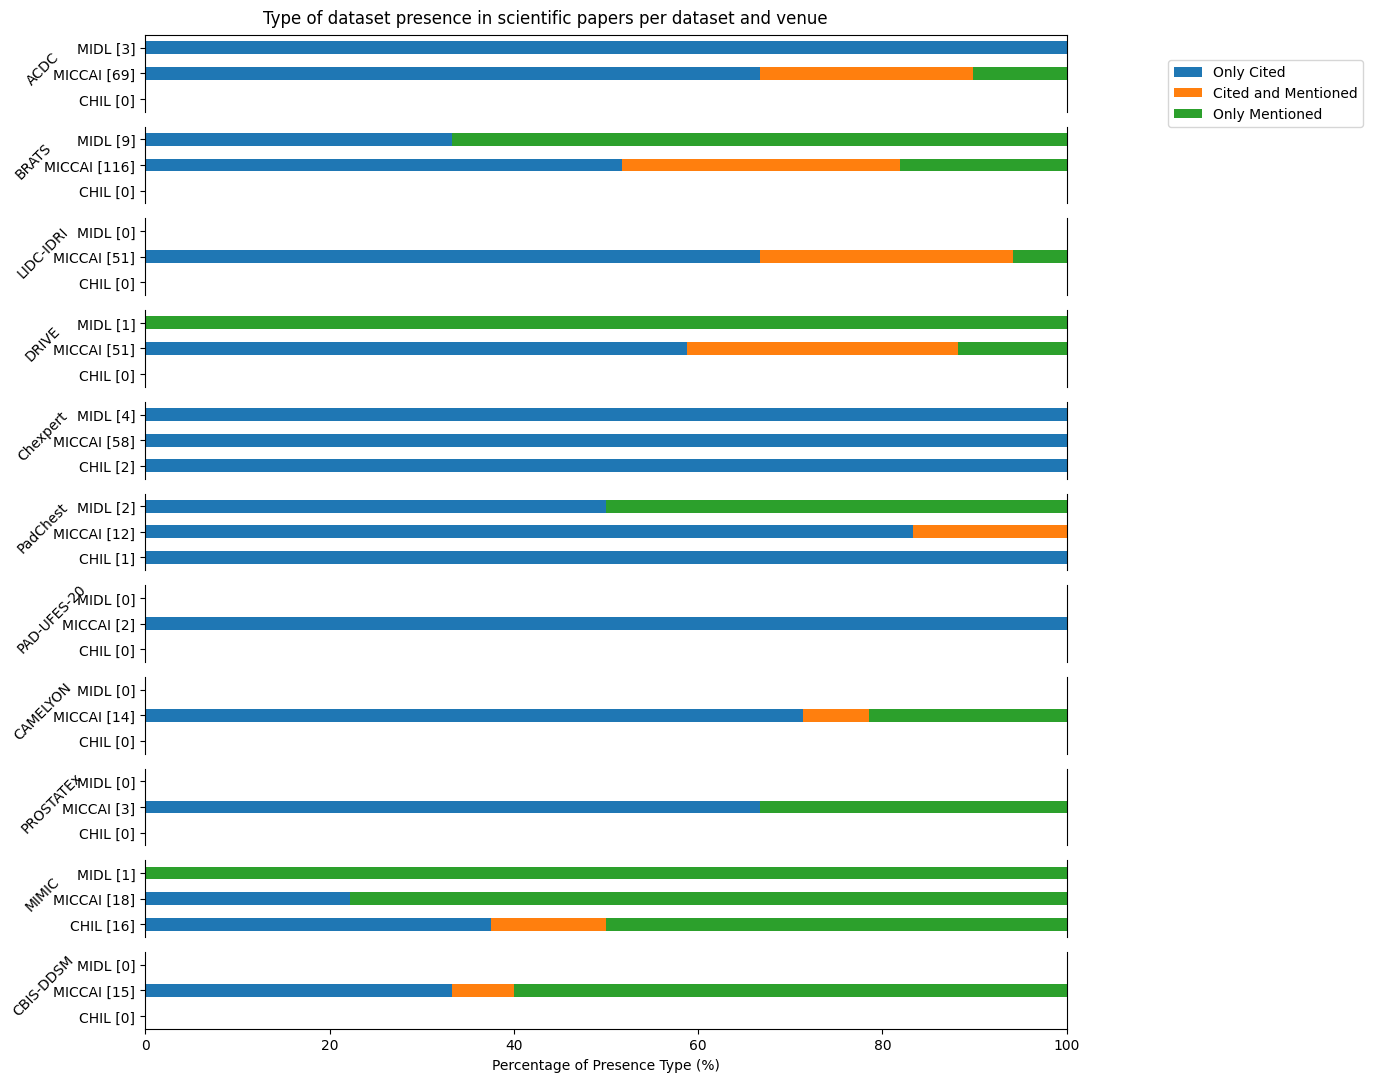

In [32]:
f,axes = plt.subplots(len(perc_ref_venue.columns),1,figsize=(11,11))
for i,dataset in enumerate(perc_ref_venue.columns):
    ax = axes[i]
    abstract_per = perc_abstract_venue[dataset]
    ref_per = perc_ref_venue[dataset]
    both_per = perc_both_venue[dataset]
    df = pd.DataFrame(data=[ref_per,both_per,abstract_per])
    df.index = ["Only Cited","Cited and Mentioned", "Only Mentioned"]
    ax = df.T.plot.barh(stacked=True,ax=ax)
    ax.get_legend().remove()
    ax.set_ylabel(dataset,rotation=45)
    ax.set_yticklabels([f"{venue} [{total_papers_per_dataset_and_venue.loc[dataset][venue]}]" for venue in total_papers_per_dataset_and_venue.loc[dataset].index])
    ax.get_xaxis().set_visible(False)
    ax.set_xlim(0,100)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)

axes[0].spines["top"].set_visible(True)
ax.spines["bottom"].set_visible(True)
ax.get_xaxis().set_visible(True)
ax.set_xlabel("Percentage of Presence Type (%)")
handles, labels = ax.get_legend_handles_labels()
f.legend(handles, labels,bbox_to_anchor=(1.25, 0.94))
plt.suptitle("Type of dataset presence in scientific papers per dataset and venue")
f.tight_layout()


In [33]:
total_papers_per_dataset_and_venue

venue,CHIL,MICCAI,MIDL
ACDC,0,69,3
BRATS,0,116,9
LIDC-IDRI,0,51,0
DRIVE,0,51,1
Chexpert,2,58,4
PadChest,1,12,2
PAD-UFES-20,0,2,0
CAMELYON,0,14,0
PROSTATEx,0,3,0
MIMIC,16,18,1


## Evolution of presence type over years

In [34]:
df_only_ref["year"] = df_merge_ref["year"]
df_only_abstract["year"] = df_merge_ref["year"]
df_abstract_and_ref["year"] = df_merge_ref["year"]

ref_citing_per_year = df_only_ref.groupby(["year","venue"]).sum().sum(axis=1).unstack(fill_value=0)
abstract_mention_per_year = df_only_abstract.groupby(["year","venue"]).sum().sum(axis=1).unstack(fill_value=0)
both_per_year = df_abstract_and_ref.groupby(["year","venue"]).sum().sum(axis=1).unstack(fill_value=0)
total_number_of_citations_per_year = ref_citing_per_year + abstract_mention_per_year + both_per_year

<Figure size 640x480 with 0 Axes>

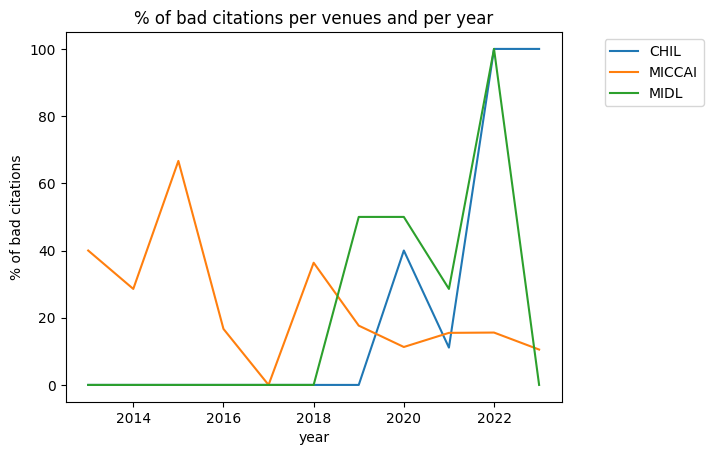

In [35]:
#A bad citation is being mentionned in the fulltext but not in the reference section
df_evol_perc = ((abstract_mention_per_year / total_number_of_citations_per_year) * 100).fillna(0)
plt.figure()
df_evol_perc.plot()
plt.ylabel("% of bad citations")
plt.legend(bbox_to_anchor=(1.3, 1))
plt.title("% of bad citations per venues and per year")
plt.show()

## % of citation per dataset in venue

In [36]:
total_number_of_citations_per_year

venue,CHIL,MICCAI,MIDL
year,,,
2013.0,0,5,0
2014.0,0,7,0
2015.0,0,3,0
2016.0,0,6,0
2017.0,0,10,0
2018.0,0,22,0
2019.0,0,51,2
2020.0,5,62,8
2021.0,9,71,7


Text(0, 0.5, '% of presence')

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

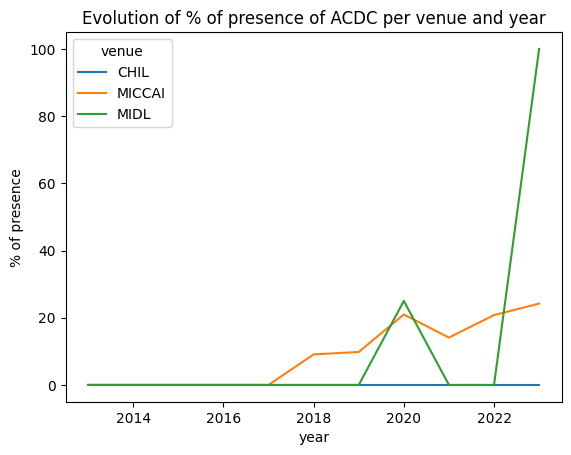

In [37]:
all_combine = df_only_ref.copy()
all_combine[datasets_columns] = df_only_ref[datasets_columns] | df_only_abstract[datasets_columns] | df_abstract_and_ref[datasets_columns]
plt.figure()
nb_dataset_per_year_and_venue = all_combine[all_combine["ACDC"]].groupby(["year","venue"]).count()["ACDC"].unstack()
plt.figure()
((nb_dataset_per_year_and_venue / total_number_of_citations_per_year)*100).fillna(0).plot()
plt.title("Evolution of % of presence of ACDC per venue and year")
plt.ylabel("% of presence")

## % of dataset for a specific venue

<Figure size 640x480 with 0 Axes>

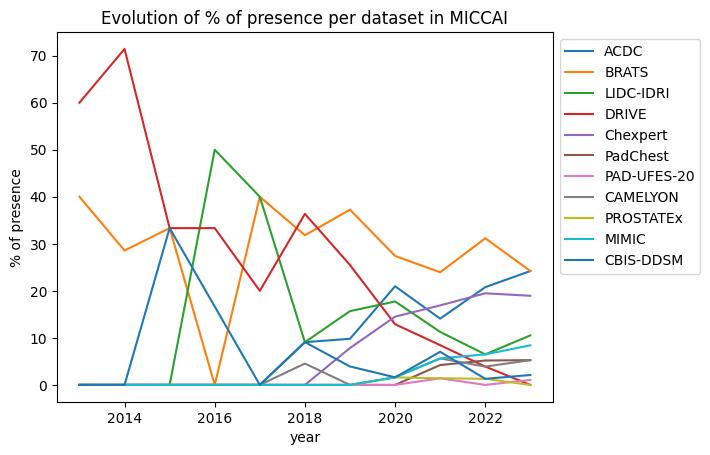

In [38]:
all_combine = df_only_ref.copy()
all_combine[datasets_columns] = df_only_ref[datasets_columns] | df_only_abstract[datasets_columns] | df_abstract_and_ref[datasets_columns]
plt.figure()
(all_combine[all_combine["venue"] == "MICCAI"].groupby(["year"])[datasets_columns].sum().divide(total_number_of_citations_per_year["MICCAI"],axis=0)*100).plot()
plt.title("Evolution of % of presence per dataset in MICCAI")
plt.ylabel("% of presence")
plt.legend(bbox_to_anchor=(1,1))

<Axes: xlabel='year'>

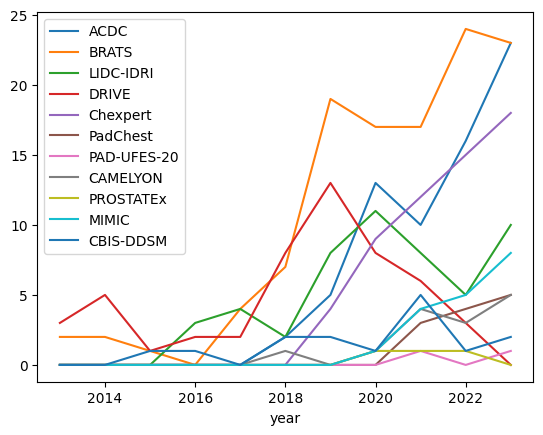

In [39]:
all_combine[all_combine["venue"] == "MICCAI"].groupby(["year"])[datasets_columns].sum().plot()


Text(0, 0.5, 'Cumulative presence count')

<Figure size 640x480 with 0 Axes>

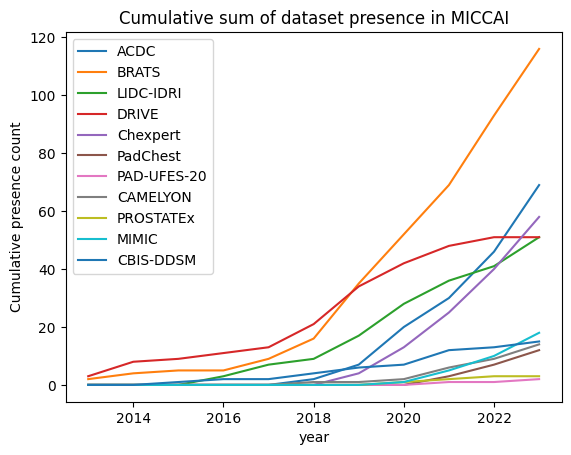

In [40]:
plt.figure()
all_combine[all_combine["venue"] == "MICCAI"].groupby(["year"])[datasets_columns].sum().cumsum().plot()
plt.title("Cumulative sum of dataset presence in MICCAI")
plt.ylabel("Cumulative presence count")

In [5]:
all_combine[all_combine["venue"] == "MICCAI"].groupby(["year"])[datasets_columns].sum().cumsum()

NameError: name 'all_combine' is not defined

## Number of references per venue

Text(0, 0.5, 'Mean number of references')

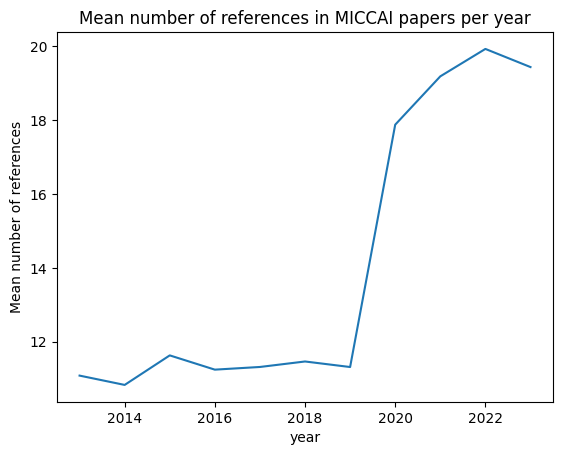

In [42]:
from ast import literal_eval
df_oa = pd.read_csv("../../Results/extraction/papers_infos_openalex.csv")
def number_of_reference(x):
    if x == x:
        list_ref = literal_eval(x)
        return len(list_ref)
    else:
        return 0
df_oa["nb_ref"] = df_oa["references"].apply(number_of_reference)
#df_oa.groupby(["venue","year"]).sum()["nb_ref"].unstack().fillna(0)["MICCAI"] / df_oa.groupby(["venue","year"]).sum()
plt.figure()
plt.title("Mean number of references in MICCAI papers per year")
(df_oa.groupby(["venue","year"]).sum()["nb_ref"].unstack().fillna(0).T["MICCAI"] / df_oa.groupby(["venue","year"]).size().unstack().fillna(0).T["MICCAI"]).plot()
plt.ylabel("Mean number of references")

In [43]:
df_oa.groupby(["venue","year"]).sum()["nb_ref"].unstack().fillna(0).T["MICCAI"] / df_oa.groupby(["venue","year"]).size().unstack().fillna(0).T["MICCAI"]

year
2013.0    11.079848
2014.0    10.827451
2015.0    11.627376
2016.0    11.241228
2017.0    11.313725
2018.0    11.462366
2019.0    11.312268
2020.0    17.876384
2021.0    19.185455
2022.0    19.928447
2023.0    19.436986
Name: MICCAI, dtype: float64

In [44]:
df_oa.groupby(["venue","year"]).size().unstack().fillna(0).T["MICCAI"]

year
2013.0    263.0
2014.0    255.0
2015.0    263.0
2016.0    228.0
2017.0    255.0
2018.0    372.0
2019.0    538.0
2020.0    542.0
2021.0    550.0
2022.0    573.0
2023.0    730.0
Name: MICCAI, dtype: float64